In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn import linear_model

In [6]:
import statsmodels.api as sm

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib as mpl

In [9]:
import matplotlib.pyplot as plt

# Lectura de la base de datos 

In [10]:
df = pd.read_csv('adultosf2.csv')
df

,estrato,region_cv,est_sel,ENTIDAD,MUNICIPIO,LOCALIDAD,RESULTADO_1,RESULTADO_2,RESULTADO_3,RESULTADO_4,...,TIEMPO,HORA_FIN,FECHA_FIN,COMPLETA,OTROENT,ADUL_COMP,ponde_g,rural_20,ponde_g20,area_20
0,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,19:25:43,12/10/20,1,,1,10864.652430,3,14033.814540,2
1,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,14:28:48,12/10/20,1,,1,10864.652430,3,14033.814540,2
2,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,17:49:35,13/10/20,1,,1,10864.652430,3,14033.814540,2
3,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,12:19:53,12/10/20,1,,1,10380.623150,3,9574.774416,2
4,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,6,11:49:40,12/10/20,1,,1,10455.582230,3,9643.914413,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,4,13:14:17,24/10/20,1,,1,6281.261595,3,8113.472651,2
8591,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,3,12:05:09,23/10/20,1,,1,12002.852370,3,11071.069820,2
8592,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,3,12:53:15,23/10/20,1,,1,12890.885940,3,16121.631790,2
8593,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,5,14:35:38,24/10/20,1,,1,18843.784790,3,24340.417950,2


# Información sobre el incremento de la violencia durante el confinamiento por Covid-19 

## 1 ) Descripcion del Dataset: 
 La información proviene de entrevistas realizadas durante el confinamiento por COVID-19 en México, en estas entrevistas se buscaba analizar el efecto que tuvo este confinamiento en violencia y censar la posibilidad de que las personas se aplicaran la vacuna del covid una vez que estuviera disponible. 

## La hipótesis a analizar es que existe una correlación entre el rechazo de la vacuna contra covid-19  y el incremento en la violencia durante confinamiento 
 Además de interés conocer: 
 
* ¿Que rango de edades considera el estudio?
* ¿Que grupos de edades tienen más posibilidades de aceptar o no la nueva vacuna contra covid-19?
* ¿El género afecta la aceptación de las vacunas?
* ¿Está relacionado el rechazo de la vacuna contra el Covid-19 con la violencia sufrida durante el confinamiento?
* ¿Cuales son los estados de la Republica Mexicana con mayor rechazo a la vacuna contra Covid-19?
* ¿Se puede predecir el incremento en al violencia usando la Edad del entrevistado?
 

### Limpieza del dataset 

In [11]:
df.columns

Index(['estrato', 'region_cv', 'est_sel', 'ENTIDAD', 'MUNICIPIO', 'LOCALIDAD',
       'RESULTADO_1', 'RESULTADO_2', 'RESULTADO_3', 'RESULTADO_4',
       'ACEPTO ENTREVISTA', 'ADUL', 'GENERO', 'EDAD', 'NOTA04', 'VINFLUENZA',
       'VCOVID', 'FUMADOR', 'ALCOHOL', 'NOTA06', 'AGRESION', 'SUICIDIO',
       'VIOLENCIAH', 'INCREMENTOV', 'ADUL301B', 'ADUL302B', 'ADUL301C',
       'ADUL302C', 'ADUL301D', 'ADUL302D', 'COMENTARIO', 'TIEMPO', 'HORA_FIN',
       'FECHA_FIN', 'COMPLETA', 'OTROENT', 'ADUL_COMP', 'ponde_g', 'rural_20',
       'ponde_g20', 'area_20'],
      dtype='object')

In [12]:
df.drop(['estrato', 'region_cv','est_sel',  'NOTA04', 'NOTA06',  'RESULTADO_1', 'RESULTADO_2' ,'RESULTADO_3','RESULTADO_4'],
        axis = 1,
        inplace = True)
df.head()

,ENTIDAD,MUNICIPIO,LOCALIDAD,ACEPTO ENTREVISTA,ADUL,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,...,TIEMPO,HORA_FIN,FECHA_FIN,COMPLETA,OTROENT,ADUL_COMP,ponde_g,rural_20,ponde_g20,area_20
0,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,67,1,2,3,...,3,19:25:43,12/10/20,1,,1,10864.65243,3,14033.814540,2
1,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,92,2,2,3,...,3,14:28:48,12/10/20,1,,1,10864.65243,3,14033.814540,2
2,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,71,2,2,3,...,3,17:49:35,13/10/20,1,,1,10864.65243,3,14033.814540,2
3,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,57,2,2,1,...,3,12:19:53,12/10/20,1,,1,10380.62315,3,9574.774416,2
4,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,73,2,1,3,...,6,11:49:40,12/10/20,1,,1,10455.58223,3,9643.914413,2


In [13]:
df.columns

Index(['ENTIDAD', 'MUNICIPIO', 'LOCALIDAD', 'ACEPTO ENTREVISTA', 'ADUL',
       'GENERO', 'EDAD', 'VINFLUENZA', 'VCOVID', 'FUMADOR', 'ALCOHOL',
       'AGRESION', 'SUICIDIO', 'VIOLENCIAH', 'INCREMENTOV', 'ADUL301B',
       'ADUL302B', 'ADUL301C', 'ADUL302C', 'ADUL301D', 'ADUL302D',
       'COMENTARIO', 'TIEMPO', 'HORA_FIN', 'FECHA_FIN', 'COMPLETA', 'OTROENT',
       'ADUL_COMP', 'ponde_g', 'rural_20', 'ponde_g20', 'area_20'],
      dtype='object')

In [14]:
df.drop(['ADUL301B', 'ADUL302B','ADUL301C', 'ADUL302C', 'ADUL301D',  'ADUL302D', 'COMENTARIO' ,'TIEMPO','HORA_FIN','FECHA_FIN', 'COMPLETA', 'OTROENT',
       'ADUL_COMP', 'ponde_g', 'rural_20', 'ponde_g20', 'area_20' ],
        axis = 1,
        inplace = True)
df.columns

Index(['ENTIDAD', 'MUNICIPIO', 'LOCALIDAD', 'ACEPTO ENTREVISTA', 'ADUL',
       'GENERO', 'EDAD', 'VINFLUENZA', 'VCOVID', 'FUMADOR', 'ALCOHOL',
       'AGRESION', 'SUICIDIO', 'VIOLENCIAH', 'INCREMENTOV'],
      dtype='object')

In [15]:
df.dtypes

ENTIDAD              object
MUNICIPIO            object
LOCALIDAD            object
ACEPTO ENTREVISTA     int64
ADUL                  int64
GENERO                int64
EDAD                  int64
VINFLUENZA            int64
VCOVID                int64
FUMADOR               int64
ALCOHOL               int64
AGRESION              int64
SUICIDIO              int64
VIOLENCIAH            int64
INCREMENTOV          object
dtype: object

### Variables de Interés:
* ENTIDAD = Estado donde se realizo la entrevista,
* GENERO = Género de la persona que contesta la encuesta
* EDAD = Edad de la persona que contesta la encuesta 
* VCOVID = ¿Se pondrían la vacuna del covid?, 
* AGRESION = Ha sufrido agresiones durante la cuarentena?,
* SUICIDIO = Ha pensado en el suicido?, 
* VIOLENCIA H = Se ha incrementado la violencia en el hogar por la cuarentena?

In [16]:
def categorizar(x): #en esta parte definimos la funcion que se categorizará
    if(0<= x <=19): # estas son las categorías
        return '<20'
    elif(20<= x <=29):
        return '20 - 29'
    elif(30<= x <= 39):
        return '30 - 39'
    else:
        return '>=40'

df['GRUPOE'] = df.apply(
        lambda tbl: categorizar(tbl['EDAD']), #En este punto estamos agregando la columna ageGP y le decimos que utilice la funcion categorizar
        axis = 1 )

In [17]:
df.head(5)

,ENTIDAD,MUNICIPIO,LOCALIDAD,ACEPTO ENTREVISTA,ADUL,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
0,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,67,1,2,3,4,2,5,2,,>=40
1,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,92,2,2,3,5,2,5,2,,>=40
2,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,71,2,2,3,5,2,5,2,,>=40
3,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,57,2,2,1,5,2,5,9,,>=40
4,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,73,2,1,3,3,2,5,9,,>=40


In [18]:
df.VCOVID.unique()

array([2, 1, 9])

### Tipo de las variables 

In [19]:
df.dtypes

ENTIDAD              object
MUNICIPIO            object
LOCALIDAD            object
ACEPTO ENTREVISTA     int64
ADUL                  int64
GENERO                int64
EDAD                  int64
VINFLUENZA            int64
VCOVID                int64
FUMADOR               int64
ALCOHOL               int64
AGRESION              int64
SUICIDIO              int64
VIOLENCIAH            int64
INCREMENTOV          object
GRUPOE               object
dtype: object

In [20]:
df.set_index('ENTIDAD', inplace=True)

In [21]:
df.head(5)

,MUNICIPIO,LOCALIDAD,ACEPTO ENTREVISTA,ADUL,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,57,2,2,1,5,2,5,9,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,73,2,1,3,3,2,5,9,,>=40


In [22]:
df.drop(['ACEPTO ENTREVISTA', 'ADUL'],
        axis = 1,
        inplace = True)
df.columns

Index(['MUNICIPIO', 'LOCALIDAD', 'GENERO', 'EDAD', 'VINFLUENZA', 'VCOVID',
       'FUMADOR', 'ALCOHOL', 'AGRESION', 'SUICIDIO', 'VIOLENCIAH',
       'INCREMENTOV', 'GRUPOE'],
      dtype='object')

In [23]:
df.head(5)

,MUNICIPIO,LOCALIDAD,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,57,2,2,1,5,2,5,9,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,73,2,1,3,3,2,5,9,,>=40


### Analisis de la información 

In [24]:
counts = df['GRUPOE'].value_counts()
type(counts)
counts = counts.to_frame()
counts

,GRUPOE
>=40,5221
20 - 29,1757
30 - 39,1617


In [25]:
counts['%'] = counts.iloc[:,-1]/(counts.iloc[:,-1].sum(axis = 0))*100

In [26]:
counts

,GRUPOE,%
>=40,5221,60.744619
20 - 29,1757,20.442118
30 - 39,1617,18.813264


In [27]:
counts.columns = ['Count','%']
counts

,Count,%
>=40,5221,60.744619
20 - 29,1757,20.442118
30 - 39,1617,18.813264


In [28]:
counts.reset_index(drop=True)
counts

,Count,%
>=40,5221,60.744619
20 - 29,1757,20.442118
30 - 39,1617,18.813264


In [29]:
counts.columns

Index(['Count', '%'], dtype='object')

In [30]:
#hist_plot = df['EDAD'].plot(kind = 'hist') 

Text(0.5, 1.0, 'Distribución de las edades en la encuesta')

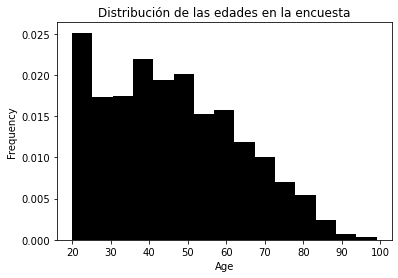

In [31]:
n, bins, patches=plt.hist(df['EDAD'],bins=15,density=True,color='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribución de las edades en la encuesta")


/Users/amecaramirez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EDAD', ylabel='Density'>

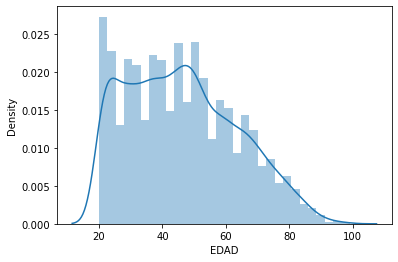

In [32]:
sns.distplot(df.EDAD)


## Pregunta 1: ¿Que rangos de edades considera este estudio? 

/Users/amecaramirez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribución de las edades de los encuestados')

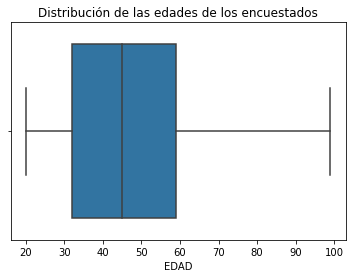

In [33]:
sns.boxplot(df['EDAD'],
           whis = (0,100)
           ).set_title('Distribución de las edades de los encuestados')



### Conclusión : Los encuestados tienen rangos de edades entre **20 y 100 años**, el **75%** de los encuestados está entre los **30 y los 60 años** 

In [34]:
df['GENERO'] = df['GENERO'].astype('object')

In [35]:
df.dtypes

MUNICIPIO      object
LOCALIDAD      object
GENERO         object
EDAD            int64
VINFLUENZA      int64
VCOVID          int64
FUMADOR         int64
ALCOHOL         int64
AGRESION        int64
SUICIDIO        int64
VIOLENCIAH      int64
INCREMENTOV    object
GRUPOE         object
dtype: object

In [36]:
df['VCOVID'] = df['VCOVID'].astype('object')
df.dtypes

MUNICIPIO      object
LOCALIDAD      object
GENERO         object
EDAD            int64
VINFLUENZA      int64
VCOVID         object
FUMADOR         int64
ALCOHOL         int64
AGRESION        int64
SUICIDIO        int64
VIOLENCIAH      int64
INCREMENTOV    object
GRUPOE         object
dtype: object

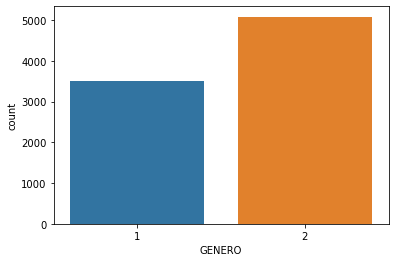

In [37]:
plt = sns.countplot(x = 'GENERO',
              data =df
             )


### Se observa que el **sexo 2** es el que más contesto en la encuesta 

# ¿Hay algun grupo de Edad que muestre mayor aceptación a la futura vacuna del covid 19?

In [38]:
#sns.countplot(data=df, x='GRUPOE', hue='VCOVID',)
#plt.title('Aceptación de la vacuna Covid segun Grupo de Edad')
#plt.xlabel('Grupo de Edad')
#plt.ylabel('Num. Personas')


In [39]:
ed = pd.pivot_table(df,
                      index = ['GRUPOE'],
                      values = ['VIOLENCIAH'],
                      columns =['VCOVID'],
                     aggfunc = 'count',
                     margins = True, margins_name ='Total'
                     )
ed                 

VIOLENCIAH                 
VCOVID           1     2    9 Total
GRUPOE                             
20 - 29       1187   408  162  1757
30 - 39        994   444  179  1617
>=40          3031  1560  630  5221
Total         5212  2412  971  8595

In [40]:
ed.columns

MultiIndex([('VIOLENCIAH',       1),
            ('VIOLENCIAH',       2),
            ('VIOLENCIAH',       9),
            ('VIOLENCIAH', 'Total')],
           names=[None, 'VCOVID'])

In [41]:
ed.shape

(4, 4)

In [42]:
ed['%'] = ed.iloc[:,0]/(ed.iloc[:,-1])*100 
ed

VIOLENCIAH                           %
VCOVID           1     2    9 Total           
GRUPOE                                        
20 - 29       1187   408  162  1757  67.558338
30 - 39        994   444  179  1617  61.471861
>=40          3031  1560  630  5221  58.054013
Total         5212  2412  971  8595  60.639907

In [43]:
#color_list = ['gold','yellowgreen','coral', 'skyblue','lightgreen','pink'] #colores para cada area 
#explode_list = [0.03, 0.03, 0.03, 0.03] #esto es para separar las areas los numeros pueden ser iguales o distintos

#por.plot(kind = 'pie',
 #                    figsize = (15,6),
  #                   labels = None,
   #                  autopct = '%1.1f%%',#cantidad de decimales
    #                 textprops ={'color': 'r'},
     #                pctdistance = 1.2,
      #               startangle = 90,
       #              shadow = True,
        #             colors = color_list,
         #            explode = explode_list
          #          )
#plt.legend(labels = ed['GRUPOE'], #esto es para agregarle la leyenda de la tabla que graficamos
 #          bbox_to_anchor = (1.0, 1.0)
  #        )

### Conclusión: El grupo de 20-29 años, tiene una aceptacion de 67% de los encuestados, la mayor de los distintos grupos 

## ¿El genero femenino tiene una mayor aceptación a la vacuna?  

In [44]:
avBi2 = pd.pivot_table(df,
                      index = ['GENERO'],
                      values = ['VIOLENCIAH'],
                      columns =['VCOVID'],
                     aggfunc = 'count',
                     margins = True, margins_name ='Total'
                     )
avBi2

VIOLENCIAH                 
VCOVID          1     2    9 Total
GENERO                            
1            2238   945  328  3511
2            2974  1467  643  5084
Total        5212  2412  971  8595

In [45]:
avBi2['%'] = avBi2.iloc[:,0]/(avBi2.iloc[:,-1])*100 
avBi2

VIOLENCIAH                           %
VCOVID          1     2    9 Total           
GENERO                                       
1            2238   945  328  3511  63.742523
2            2974  1467  643  5084  58.497246
Total        5212  2412  971  8595  60.639907

In [46]:
gen = pd.pivot_table(df, ## Genero y aceptacion vacuna 
                      index = ['GENERO'],
                      values = ['VIOLENCIAH'],
                      columns =['VCOVID'],
                     aggfunc = 'count',
                
                     )
gen

VIOLENCIAH           
VCOVID          1     2    9
GENERO                      
1            2238   945  328
2            2974  1467  643

In [47]:
gen.columns

MultiIndex([('VIOLENCIAH', 1),
            ('VIOLENCIAH', 2),
            ('VIOLENCIAH', 9)],
           names=[None, 'VCOVID'])

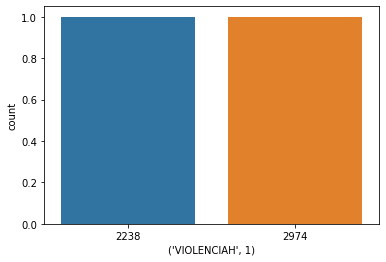

In [48]:
plt = sns.countplot(x = ('VIOLENCIAH', 1),
              data =gen
             )

## Conclusión: No hay diferencia entre los generos sobre la aceptación de la vacuna Covid-19

In [49]:
df

,MUNICIPIO,LOCALIDAD,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,57,2,2,1,5,2,5,9,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,73,2,1,3,3,2,5,9,,>=40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,2,58,2,2,1,5,2,5,2,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,57,2,2,3,5,2,5,9,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,37,1,1,3,5,2,5,9,,30 - 39


In [50]:
df.dtypes

MUNICIPIO      object
LOCALIDAD      object
GENERO         object
EDAD            int64
VINFLUENZA      int64
VCOVID         object
FUMADOR         int64
ALCOHOL         int64
AGRESION        int64
SUICIDIO        int64
VIOLENCIAH      int64
INCREMENTOV    object
GRUPOE         object
dtype: object

In [51]:
states = pd.pivot_table(df,
                      index = ['ENTIDAD'],
                      values =['VCOVID'],  
                      columns =['VIOLENCIAH'],
                     aggfunc = 'count' 
                     )
states

VCOVID              
VIOLENCIAH                              1      2      9
ENTIDAD                                                
01 AGUASCALIENTES                     5.0   32.0   22.0
02 BAJA CALIFORNIA                    9.0  112.0  113.0
03 BAJA CALIFORNIA SUR                NaN   27.0   18.0
04 CAMPECHE                           1.0   32.0   28.0
05 COAHUILA DE ZARAGOZA               3.0   94.0   85.0
06 COLIMA                             2.0   26.0   17.0
07 CHIAPAS                           12.0  225.0  144.0
08 CHIHUAHUA                          3.0  118.0   90.0
09 CIUDAD DE MÉXICO                  37.0  550.0  412.0
10 DURANGO                            1.0   48.0   38.0
11 GUANAJUATO                        21.0  587.0  427.0
12 GUERRERO                           8.0  119.0   95.0
13 HIDALGO                            7.0  115.0   70.0
14 JALISCO                           11.0  251.0  208.0
15 MÉXICO                            20.0  482.0  339.0
16 MICHOACÁN DE OCAMPO                7.0  197.0  135.0
17 MORELOS                            3.0   58.0   35.0
18 NAYARIT                            3.0   52.0   29.0
19 NUEVO LEÓN                         6.0  180.0  134.0
20 OAXACA                             3.0  148.0   85.0
21 PUEBLA                             9.0  225.0  120.0
22 QUERÉTARO                          1.0   73.0   50.0
23 QUINTANA ROO                       3.0   43.0   48.0
24 SAN LUIS POTOSÍ                    5.0   68.0   59.0
25 SINALOA                           10.0  128.0   91.0
26 SONORA                             8.0  122.0  105.0
27 TABASCO                           13.0   93.0   73.0
28 TAMAULIPAS                         3.0   96.0   61.0
29 TLAXCALA                           NaN   49.0   29.0
30 VERACRUZ DE IGNACIO DE LA LLAVE   14.0  345.0  242.0
31 YUCATÁN                            5.0   90.0   73.0
32 ZACATECAS                          2.0   58.0   42.0

In [52]:
states.columns

MultiIndex([('VCOVID', 1),
            ('VCOVID', 2),
            ('VCOVID', 9)],
           names=[None, 'VIOLENCIAH'])

In [53]:
df

,MUNICIPIO,LOCALIDAD,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,57,2,2,1,5,2,5,9,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,73,2,1,3,3,2,5,9,,>=40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,2,58,2,2,1,5,2,5,2,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,57,2,2,3,5,2,5,9,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,37,1,1,3,5,2,5,9,,30 - 39


In [54]:
df.index

Index(['01 AGUASCALIENTES', '01 AGUASCALIENTES', '01 AGUASCALIENTES',
       '01 AGUASCALIENTES', '01 AGUASCALIENTES', '01 AGUASCALIENTES',
       '01 AGUASCALIENTES', '01 AGUASCALIENTES', '01 AGUASCALIENTES',
       '01 AGUASCALIENTES',
       ...
       '32 ZACATECAS', '32 ZACATECAS', '32 ZACATECAS', '32 ZACATECAS',
       '32 ZACATECAS', '32 ZACATECAS', '32 ZACATECAS', '32 ZACATECAS',
       '32 ZACATECAS', '32 ZACATECAS'],
      dtype='object', name='ENTIDAD', length=8595)

In [55]:
#df.reset_index()

In [56]:
states = pd.pivot_table(df,
                      index = ['ENTIDAD'],
                      values =['VIOLENCIAH'],  
                      columns =['VCOVID'],
                     aggfunc = 'count' 
                     )
states #Esta tabla es sobre aceptacion de la vacuna 

VIOLENCIAH          
VCOVID                                      1    2    9
ENTIDAD                                                
01 AGUASCALIENTES                          39   15    5
02 BAJA CALIFORNIA                        163   45   26
03 BAJA CALIFORNIA SUR                     32    9    4
04 CAMPECHE                                42   11    8
05 COAHUILA DE ZARAGOZA                   123   37   22
06 COLIMA                                  26   13    6
07 CHIAPAS                                219  128   34
08 CHIHUAHUA                              130   59   22
09 CIUDAD DE MÉXICO                       699  224   76
10 DURANGO                                 57   24    6
11 GUANAJUATO                             583  298  154
12 GUERRERO                               120   86   16
13 HIDALGO                                103   51   38
14 JALISCO                                243  167   60
15 MÉXICO                                 515  252   74
16 MICHOACÁN DE OCAMPO                    167  133   39
17 MORELOS                                 59   24   13
18 NAYARIT                                 46   36    2
19 NUEVO LEÓN                             179   76   65
20 OAXACA                                 116   83   37
21 PUEBLA                                 211  100   43
22 QUERÉTARO                               70   42   12
23 QUINTANA ROO                            57   27   10
24 SAN LUIS POTOSÍ                         63   38   31
25 SINALOA                                139   68   22
26 SONORA                                 148   66   21
27 TABASCO                                128   35   16
28 TAMAULIPAS                             104   39   17
29 TLAXCALA                                39   28   11
30 VERACRUZ DE IGNACIO DE LA LLAVE        373  162   66
31 YUCATÁN                                140   17   11
32 ZACATECAS                               79   19    4

In [57]:
states.columns

MultiIndex([('VIOLENCIAH', 1),
            ('VIOLENCIAH', 2),
            ('VIOLENCIAH', 9)],
           names=[None, 'VCOVID'])

In [58]:
vio = states[('VIOLENCIAH', 2)]
vio #2 SIGNIFICA QUE no aceptarian la vacuna del covid  

ENTIDAD
01 AGUASCALIENTES                      15
02 BAJA CALIFORNIA                     45
03 BAJA CALIFORNIA SUR                  9
04 CAMPECHE                            11
05 COAHUILA DE ZARAGOZA                37
06 COLIMA                              13
07 CHIAPAS                            128
08 CHIHUAHUA                           59
09 CIUDAD DE MÉXICO                   224
10 DURANGO                             24
11 GUANAJUATO                         298
12 GUERRERO                            86
13 HIDALGO                             51
14 JALISCO                            167
15 MÉXICO                             252
16 MICHOACÁN DE OCAMPO                133
17 MORELOS                             24
18 NAYARIT                             36
19 NUEVO LEÓN                          76
20 OAXACA                              83
21 PUEBLA                             100
22 QUERÉTARO                           42
23 QUINTANA ROO                        27
24 SAN LUIS POTOSÍ        

In [59]:
vio

ENTIDAD
01 AGUASCALIENTES                      15
02 BAJA CALIFORNIA                     45
03 BAJA CALIFORNIA SUR                  9
04 CAMPECHE                            11
05 COAHUILA DE ZARAGOZA                37
06 COLIMA                              13
07 CHIAPAS                            128
08 CHIHUAHUA                           59
09 CIUDAD DE MÉXICO                   224
10 DURANGO                             24
11 GUANAJUATO                         298
12 GUERRERO                            86
13 HIDALGO                             51
14 JALISCO                            167
15 MÉXICO                             252
16 MICHOACÁN DE OCAMPO                133
17 MORELOS                             24
18 NAYARIT                             36
19 NUEVO LEÓN                          76
20 OAXACA                              83
21 PUEBLA                             100
22 QUERÉTARO                           42
23 QUINTANA ROO                        27
24 SAN LUIS POTOSÍ        

In [60]:
type(vio)

pandas.core.series.Series

In [61]:
vio.to_frame()

,VIOLENCIAH
,2
ENTIDAD,
01 AGUASCALIENTES,15
02 BAJA CALIFORNIA,45
03 BAJA CALIFORNIA SUR,9
04 CAMPECHE,11
05 COAHUILA DE ZARAGOZA,37
06 COLIMA,13
07 CHIAPAS,128
08 CHIHUAHUA,59


# ¿Cuales son las principales entidades que no aceptarían vacuna covid?

In [62]:
vio2 =vio.sort_values(ascending= False) 
vio2

ENTIDAD
11 GUANAJUATO                         298
15 MÉXICO                             252
09 CIUDAD DE MÉXICO                   224
14 JALISCO                            167
30 VERACRUZ DE IGNACIO DE LA LLAVE    162
16 MICHOACÁN DE OCAMPO                133
07 CHIAPAS                            128
21 PUEBLA                             100
12 GUERRERO                            86
20 OAXACA                              83
19 NUEVO LEÓN                          76
25 SINALOA                             68
26 SONORA                              66
08 CHIHUAHUA                           59
13 HIDALGO                             51
02 BAJA CALIFORNIA                     45
22 QUERÉTARO                           42
28 TAMAULIPAS                          39
24 SAN LUIS POTOSÍ                     38
05 COAHUILA DE ZARAGOZA                37
18 NAYARIT                             36
27 TABASCO                             35
29 TLAXCALA                            28
23 QUINTANA ROO           

TypeError: 'Text' object is not callable

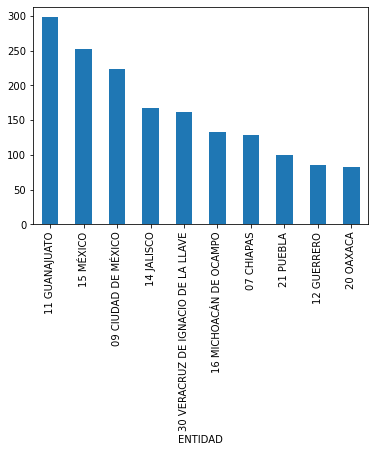

In [64]:
hist_plot = (vio2[:10]).plot(kind = 'bar') 

plt.title('TOP Entidades con rechazo a vacuna Covid')


In [65]:
df['VIOLENCIAH'] = df['VIOLENCIAH'].astype(str)

## El estado de Guanajuato es el que proporcionalmente tiene mayor cantidad de personas entrevistadas que rechazarían la vacuna contra Covid-19

In [66]:
vac = pd.pivot_table(df, # Esta es informacion sobre los principales estados donde la violencia aumento 
                      index = ['ENTIDAD'],
                      values =['VCOVID'],  
                      columns =['VIOLENCIAH'],
                     aggfunc = 'count' 
                     )
vac

VCOVID              
VIOLENCIAH                              1      2      9
ENTIDAD                                                
01 AGUASCALIENTES                     5.0   32.0   22.0
02 BAJA CALIFORNIA                    9.0  112.0  113.0
03 BAJA CALIFORNIA SUR                NaN   27.0   18.0
04 CAMPECHE                           1.0   32.0   28.0
05 COAHUILA DE ZARAGOZA               3.0   94.0   85.0
06 COLIMA                             2.0   26.0   17.0
07 CHIAPAS                           12.0  225.0  144.0
08 CHIHUAHUA                          3.0  118.0   90.0
09 CIUDAD DE MÉXICO                  37.0  550.0  412.0
10 DURANGO                            1.0   48.0   38.0
11 GUANAJUATO                        21.0  587.0  427.0
12 GUERRERO                           8.0  119.0   95.0
13 HIDALGO                            7.0  115.0   70.0
14 JALISCO                           11.0  251.0  208.0
15 MÉXICO                            20.0  482.0  339.0
16 MICHOACÁN DE OCAMPO                7.0  197.0  135.0
17 MORELOS                            3.0   58.0   35.0
18 NAYARIT                            3.0   52.0   29.0
19 NUEVO LEÓN                         6.0  180.0  134.0
20 OAXACA                             3.0  148.0   85.0
21 PUEBLA                             9.0  225.0  120.0
22 QUERÉTARO                          1.0   73.0   50.0
23 QUINTANA ROO                       3.0   43.0   48.0
24 SAN LUIS POTOSÍ                    5.0   68.0   59.0
25 SINALOA                           10.0  128.0   91.0
26 SONORA                             8.0  122.0  105.0
27 TABASCO                           13.0   93.0   73.0
28 TAMAULIPAS                         3.0   96.0   61.0
29 TLAXCALA                           NaN   49.0   29.0
30 VERACRUZ DE IGNACIO DE LA LLAVE   14.0  345.0  242.0
31 YUCATÁN                            5.0   90.0   73.0
32 ZACATECAS                          2.0   58.0   42.0

In [67]:
vac.columns

MultiIndex([('VCOVID', '1'),
            ('VCOVID', '2'),
            ('VCOVID', '9')],
           names=[None, 'VIOLENCIAH'])

In [68]:
vac2 = vac[('VCOVID', '1')] #Entidades y su incremento en violencia 
vac2

ENTIDAD
01 AGUASCALIENTES                      5.0
02 BAJA CALIFORNIA                     9.0
03 BAJA CALIFORNIA SUR                 NaN
04 CAMPECHE                            1.0
05 COAHUILA DE ZARAGOZA                3.0
06 COLIMA                              2.0
07 CHIAPAS                            12.0
08 CHIHUAHUA                           3.0
09 CIUDAD DE MÉXICO                   37.0
10 DURANGO                             1.0
11 GUANAJUATO                         21.0
12 GUERRERO                            8.0
13 HIDALGO                             7.0
14 JALISCO                            11.0
15 MÉXICO                             20.0
16 MICHOACÁN DE OCAMPO                 7.0
17 MORELOS                             3.0
18 NAYARIT                             3.0
19 NUEVO LEÓN                          6.0
20 OAXACA                              3.0
21 PUEBLA                              9.0
22 QUERÉTARO                           1.0
23 QUINTANA ROO                        3.0
24 

In [69]:
vac3 = vac2.sort_values(ascending = False)

In [70]:
vac3

ENTIDAD
09 CIUDAD DE MÉXICO                   37.0
11 GUANAJUATO                         21.0
15 MÉXICO                             20.0
30 VERACRUZ DE IGNACIO DE LA LLAVE    14.0
27 TABASCO                            13.0
07 CHIAPAS                            12.0
14 JALISCO                            11.0
25 SINALOA                            10.0
21 PUEBLA                              9.0
02 BAJA CALIFORNIA                     9.0
12 GUERRERO                            8.0
26 SONORA                              8.0
13 HIDALGO                             7.0
16 MICHOACÁN DE OCAMPO                 7.0
19 NUEVO LEÓN                          6.0
31 YUCATÁN                             5.0
24 SAN LUIS POTOSÍ                     5.0
01 AGUASCALIENTES                      5.0
23 QUINTANA ROO                        3.0
28 TAMAULIPAS                          3.0
17 MORELOS                             3.0
20 OAXACA                              3.0
18 NAYARIT                             3.0
08 

# Hay correlacion entre la violencia y el rechazo a la vacuna covid?

In [71]:
cor = vio2.to_frame(name = 'Vacuna Covid').join(vac2.to_frame(name = 'Violencia'))

In [72]:
cor

,Vacuna Covid,Violencia
ENTIDAD,,
11 GUANAJUATO,298,21.0
15 MÉXICO,252,20.0
09 CIUDAD DE MÉXICO,224,37.0
14 JALISCO,167,11.0
30 VERACRUZ DE IGNACIO DE LA LLAVE,162,14.0
16 MICHOACÁN DE OCAMPO,133,7.0
07 CHIAPAS,128,12.0
21 PUEBLA,100,9.0
12 GUERRERO,86,8.0


In [73]:
cor.corr(method = 'pearson')

,Vacuna Covid,Violencia
Vacuna Covid,1.000000,0.817215
Violencia,0.817215,1.000000


In [74]:
cor.columns

Index(['Vacuna Covid', 'Violencia'], dtype='object')

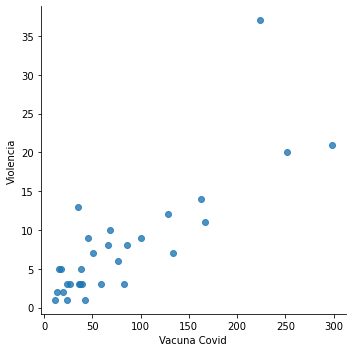

In [75]:
sns.lmplot(x = 'Vacuna Covid',
          y = 'Violencia',
          fit_reg = False,
          data = cor)
#plt.title('Diagrama Incremento de Violencia vs Rechazo a la Vacuna')

## Conclusión:  Se encuentra una correlación directa entre el rechazo de la vacuna y el incremento de la violencia durante el confinamiento 

In [76]:
df

,MUNICIPIO,LOCALIDAD,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,57,2,2,1,5,2,5,9,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,73,2,1,3,3,2,5,9,,>=40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,2,58,2,2,1,5,2,5,2,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,57,2,2,3,5,2,5,9,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,37,1,1,3,5,2,5,9,,30 - 39


In [ ]:
df['VCOVID'] = df['VCOVID'].astype(int)

In [ ]:
x = df['VCOVID']
y = df['EDAD']

# ¿Hay alguna edad que haya experimentado mayor aumento de violencia? 

<AxesSubplot:xlabel='VIOLENCIAH', ylabel='EDAD'>

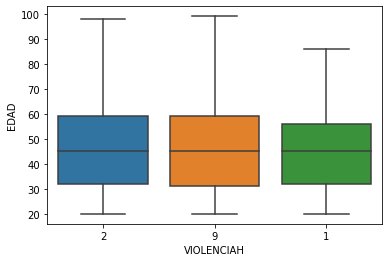

In [77]:
sns.boxplot(x = df['VIOLENCIAH'], 
            y = df['EDAD'])

## Conclusión, no se observa diferencia entre los grupos de edades. 

# ¿Que entidades exhiben un incremento en la violencia durante el confinamiento por COVID-19?

TypeError: 'Text' object is not callable

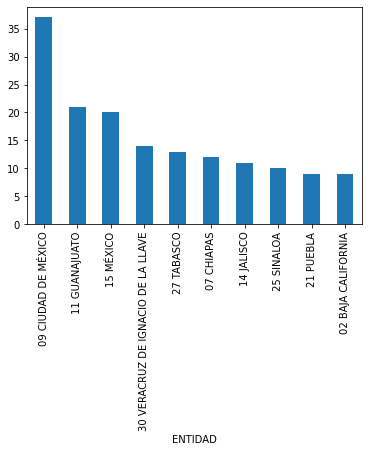

In [78]:
hist_plot2 = (vac3[:10]).plot(kind = 'bar') 


plt.title('TOP Entidades con incremento en violencia domestica durante confinamiento')
plt.show()

# Conclusión: La ciudad de México es la entidad que exhibe incremento de violencia durante el confinamiento 

In [93]:
y = pd.DataFrame(df['VIOLENCIA'])
x = pd.DataFrame(df['EDAD'])

KeyError: 'VIOLENCIA'

In [81]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [82]:
import statsmodels.api as sm


In [83]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn import linear_model

In [94]:
lm = linear_model.LinearRegression()
model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [95]:
print ('The intercept (b0) is  \t\t\t : ', model_lm.intercept_)
print ('The coefficients (b1, b2, b3, ...) are:', model_lm.coef_)
print ('Model score (R-Square) value is  \:', model_lm.score(x,y))

The intercept (b0) is  			 :  [46.60177722]
The coefficients (b1, b2, b3, ...) are: [[-0.07584729]]
Model score (R-Square) value is  \: 0.0002332121723017666


## Conclusión: La ecuación de predicción de violencia usando la Edad es la siguiente: 

## Incremento en violencia = 4.97 -0.030Edad.

### este modelo no es confiable ya que solo tiene un ajuste del 0.02% no se puede predecir el incremento de violencia segun la edad de la persona